Choose the dataset to use (1 for MNIST, 2 for Fashion MNIST, 3 for CIFAR-10, 4 for Custom CSV Data): 1
Enter the number of training epochs: 100
Loading MNIST dataset...
Epoch 1/100, Loss: 2.3132, Accuracy: 0.3418
Epoch 2/100, Loss: 2.2247, Accuracy: 0.6181
Epoch 3/100, Loss: 2.1390, Accuracy: 0.6809
Epoch 4/100, Loss: 2.0493, Accuracy: 0.7045
Epoch 5/100, Loss: 1.9538, Accuracy: 0.7246
Epoch 6/100, Loss: 1.8536, Accuracy: 0.7445
Epoch 7/100, Loss: 1.7513, Accuracy: 0.7653
Epoch 8/100, Loss: 1.6493, Accuracy: 0.7797
Epoch 9/100, Loss: 1.5489, Accuracy: 0.7940
Epoch 10/100, Loss: 1.4512, Accuracy: 0.8035
Epoch 11/100, Loss: 1.3572, Accuracy: 0.8138
Epoch 12/100, Loss: 1.2678, Accuracy: 0.8210
Epoch 13/100, Loss: 1.1840, Accuracy: 0.8241
Epoch 14/100, Loss: 1.1060, Accuracy: 0.8274
Epoch 15/100, Loss: 1.0341, Accuracy: 0.8312
Epoch 16/100, Loss: 0.9680, Accuracy: 0.8353
Epoch 17/100, Loss: 0.9076, Accuracy: 0.8387
Epoch 18/100, Loss: 0.8526, Accuracy: 0.8420
Epoch 19/100, Loss: 0.8028, Ac

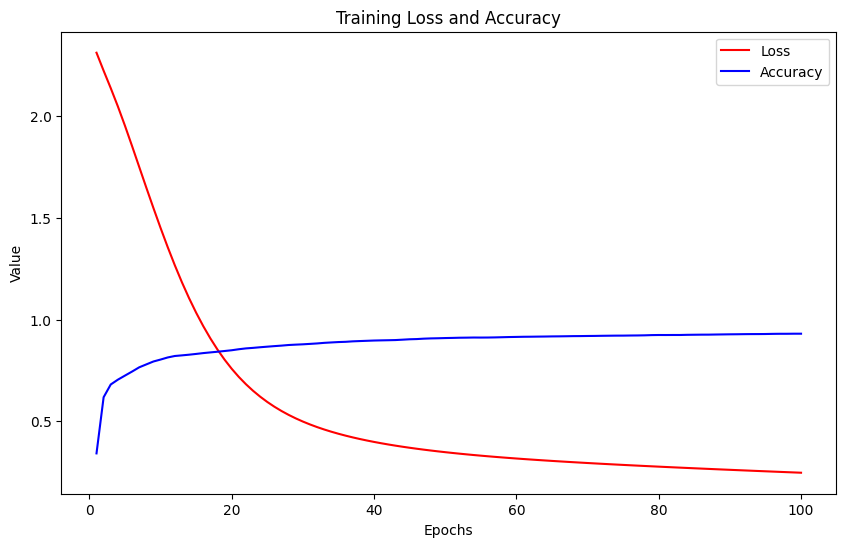

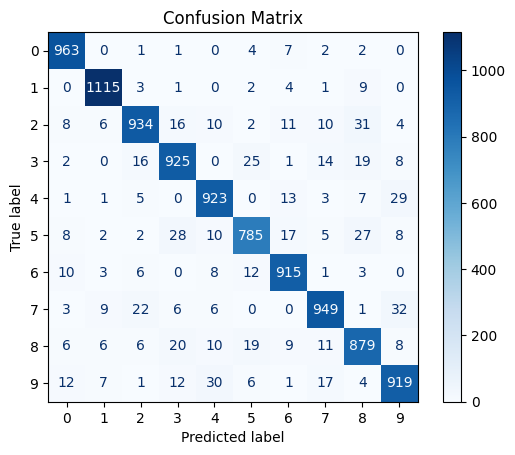


Classification Report:

              precision    recall  f1-score   support

           0     0.9506    0.9827    0.9664       980
           1     0.9704    0.9824    0.9764      1135
           2     0.9378    0.9050    0.9211      1032
           3     0.9167    0.9158    0.9163      1010
           4     0.9258    0.9399    0.9328       982
           5     0.9181    0.8800    0.8987       892
           6     0.9356    0.9551    0.9452       958
           7     0.9368    0.9232    0.9299      1028
           8     0.8951    0.9025    0.8988       974
           9     0.9117    0.9108    0.9113      1009

    accuracy                         0.9307     10000
   macro avg     0.9299    0.9297    0.9297     10000
weighted avg     0.9306    0.9307    0.9305     10000



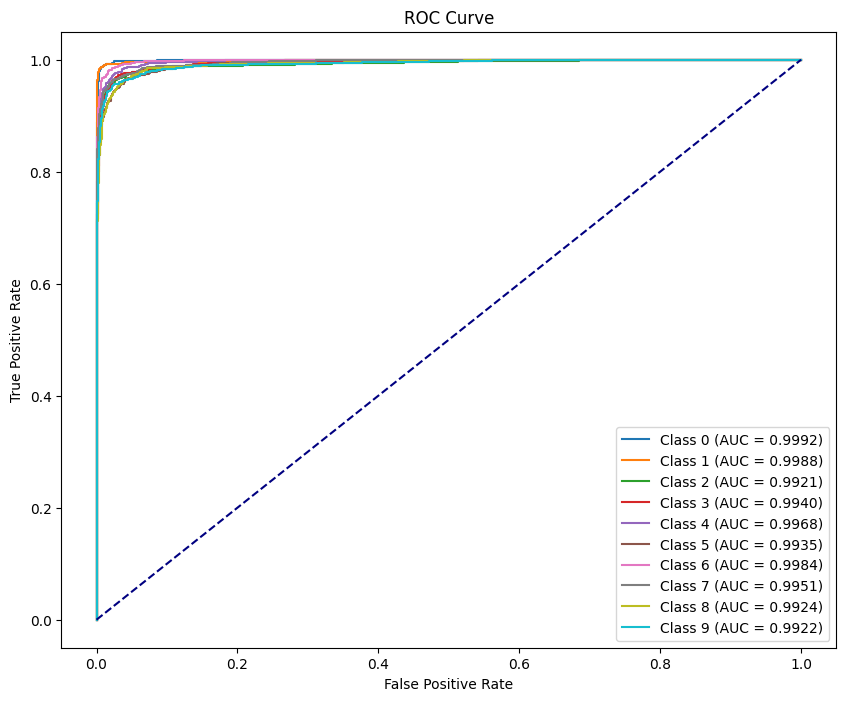


Macro-average AUC: 0.9953


In [7]:
# Install necessary libraries
!pip install torch torchvision scikit-learn matplotlib pandas

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize



# Function to apply the sigmoid function element-wise to normalize dataset values
def squash(value):
    value = np.clip(value, -500, 500)  # Clip extreme values
    return 1.0 / (1.0 + np.exp(-value))

# Normalizes a dataset using the squash function
def normalize_dataset(dataset):
    return squash(dataset)

# Load MNIST dataset
def load_mnist():
    print("Loading MNIST dataset...")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

    x_train = train_dataset.data.numpy() / 255.0
    y_train = train_dataset.targets.numpy()
    x_test = test_dataset.data.numpy() / 255.0
    y_test = test_dataset.targets.numpy()

    return x_train, y_train, x_test, y_test

# Load Fashion MNIST dataset
def load_fashion_mnist():
    print("Loading Fashion MNIST dataset...")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

    x_train = train_dataset.data.numpy() / 255.0
    y_train = train_dataset.targets.numpy()
    x_test = test_dataset.data.numpy() / 255.0
    y_test = test_dataset.targets.numpy()

    return x_train, y_train, x_test, y_test

# Load CIFAR-10 dataset
def load_cifar10():
    print("Loading CIFAR-10 dataset...")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
    test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

    x_train = train_dataset.data / 255.0
    y_train = np.array(train_dataset.targets)
    x_test = test_dataset.data / 255.0
    y_test = np.array(test_dataset.targets)

    return x_train, y_train, x_test, y_test

# Load custom training and testing datasets from CSV
def load_data(train_file_path, test_file_path, task_type='classification'):
    """
    Load and preprocess data from CSV files.

    Args:
        train_file_path (str): Path to the training dataset CSV.
        test_file_path (str): Path to the testing dataset CSV.
        task_type (str): Either 'classification' or 'regression'.

    Returns:
        x_train, y_train, x_test, y_test: Preprocessed datasets.
    """
    print(f"Loading training data from {train_file_path}...")
    train_data = pd.read_csv(train_file_path)

    print(f"Loading testing data from {test_file_path}...")
    test_data = pd.read_csv(test_file_path)

    # Identify target column (last column by default)
    target_column = train_data.columns[-1]

    # Split into features (X) and target (y)
    x_train = train_data.drop(columns=[target_column]).values
    y_train = train_data[target_column].values

    x_test = test_data.drop(columns=[target_column]).values
    y_test = test_data[target_column].values

    # Preprocess data based on task type
    if task_type == 'classification':
        # Convert targets to integer labels for classification
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        y_test = label_encoder.transform(y_test)
    elif task_type == 'regression':
        # Ensure targets are float for regression
        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

    # Normalize features
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    return x_train, y_train, x_test, y_test



# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def plot_metrics(losses, accuracies):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label="Loss", color="red")
    plt.plot(epochs, accuracies, label="Accuracy", color="blue")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.legend()
    plt.savefig("training_metrics.png")
    plt.show()


# Evaluate model and display confusion matrix and additional metrics
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

def evaluate_model(model, x_test, y_test, device, task_type='classification'):
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test)

        if task_type == 'regression':
            test_outputs = test_outputs.squeeze()
            # Convert predictions and true labels to NumPy arrays
            y_true = y_test.cpu().numpy()
            y_pred = test_outputs.cpu().numpy()

            # Calculate regression metrics
            mse = mean_squared_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)

            print(f"\nEvaluation Metrics:")
            print(f"Mean Squared Error (MSE): {mse:.4f}")
            print(f"Mean Absolute Error (MAE): {mae:.4f}")
        else:
            # Classification-specific evaluation
            probabilities = torch.softmax(test_outputs, dim=1).cpu().numpy()
            predictions = np.argmax(probabilities, axis=1)
            y_true = y_test.cpu().numpy()
            y_pred = predictions

            # Calculate confusion matrix
            cm = confusion_matrix(y_true, y_pred)

            # Display confusion matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(len(np.unique(y_true))))
            disp.plot(cmap=plt.cm.Blues)
            plt.title("Confusion Matrix")
            plt.show()

            # Calculate and display classification report
            report = classification_report(y_true, y_pred, digits=4)
            print("\nClassification Report:\n")
            print(report)

            # Compute ROC curve and AUC for each class
            n_classes = probabilities.shape[1]
            y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))
            fpr, tpr, roc_auc = {}, {}, {}

            plt.figure(figsize=(10, 8))
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], probabilities[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
                plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

            # Plot diagonal
            plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend(loc="lower right")
            plt.show()

            # Calculate macro-average AUC
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= n_classes
            macro_auc = auc(all_fpr, mean_tpr)
            print(f"\nMacro-average AUC: {macro_auc:.4f}")


# Main function
def main():
    dataset_choice = int(input(
        "Choose the dataset to use (1 for MNIST, 2 for Fashion MNIST, 3 for CIFAR-10, 4 for Custom CSV Data): ").strip())
    epochs = int(input("Enter the number of training epochs: ").strip())

    # Load dataset
    if dataset_choice == 1:
        x_train, y_train, x_test, y_test = load_mnist()
        input_dim, output_dim = 28 * 28, 10
        task_type = "classification"
    elif dataset_choice == 2:
        x_train, y_train, x_test, y_test = load_fashion_mnist()
        input_dim, output_dim = 28 * 28, 10
        task_type = "classification"
    elif dataset_choice == 3:
        x_train, y_train, x_test, y_test = load_cifar10()
        input_dim, output_dim = 32 * 32 * 3, 10
        task_type = "classification"
    elif dataset_choice == 4:
        train_file_path = input("Enter the path to the training CSV file: ").strip()
        test_file_path = input("Enter the path to the testing CSV file: ").strip()
        task_type = input("Enter the task type (classification or regression): ").strip().lower()
        if task_type not in ['classification', 'regression']:
            raise ValueError("Invalid task type! Choose 'classification' or 'regression'.")
        x_train, y_train, x_test, y_test = load_data(train_file_path, test_file_path, task_type)
        input_dim = x_train.shape[1]
        output_dim = len(np.unique(y_train)) if task_type == 'classification' else 1
    else:
        print("Invalid choice! Defaulting to MNIST.")
        x_train, y_train, x_test, y_test = load_mnist()
        input_dim, output_dim = 28 * 28, 10
        task_type = "classification"

    # Initialize the model, optimizer, and loss function
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = NeuralNet(input_dim, output_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    if task_type == "classification":
        criterion = nn.CrossEntropyLoss()
        y_train = torch.tensor(y_train, dtype=torch.long).to(device)
        y_test = torch.tensor(y_test, dtype=torch.long).to(device)
    elif task_type == "regression":
        criterion = nn.MSELoss()
        y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
        y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

    x_train = torch.tensor(x_train.reshape(-1, input_dim), dtype=torch.float32).to(device)
    x_test = torch.tensor(x_test.reshape(-1, input_dim), dtype=torch.float32).to(device)

    # Training loop
    losses, accuracies = [], []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)

        if task_type == "regression":
            outputs = outputs.squeeze()

        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        # Evaluation
        model.eval()
        with torch.no_grad():
            test_outputs = model(x_test)
            if task_type == "classification":
                predictions = torch.argmax(test_outputs, dim=1)
                accuracy = (predictions == y_test).float().mean().item()
                accuracies.append(accuracy)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")
            else:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

    if task_type == "classification":
        plot_metrics(losses, accuracies)
    evaluate_model(model, x_test, y_test, device, task_type)


if __name__ == "__main__":
    main()
